In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
from gradient.step_div_gradient import StepDivGradientDescent 
from test_functions import f1, himmelblau, ackley

x =  [1.7272708  0.45454202] ;    f(x) =  2.181818181850583


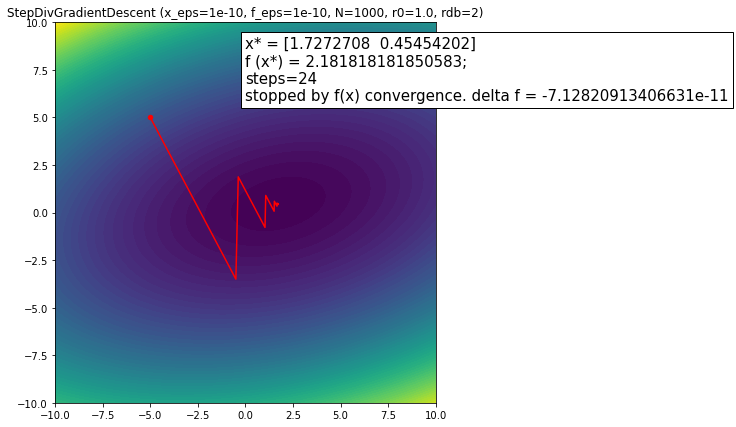

In [4]:
# Визначаємо метод оптимізації
method = StepDivGradientDescent(timeout=1000, rate=1)
# Оптимізуємо. Зберігаємо результат. (див. файл dumb_gradient.py щоб подивитися, що містить result)
result = method.optimize(f1, f1.df, x_start=(-5,5))

# Беремо з результату послідовності {x_n}, {y_n}:
#   `result['x_history']` - це послідовність {(x_n, y_n)} - матриця (n, 2)
#   `result['x_history'].T` - це транспонування матриці - маємо матрицю (2, n)
# В `x_history` потрапить перший рядок, в `y_history` - другий рядок
x_history, y_history = result['x_history'].T

# створюємо двовимірний "лінійний простір" з двох одновимірних
# np.linspace(x0, x1, n) = { x0 + k * (x1-x0)/n | k = [0,n] } 
ls = np.linspace(-10,10,200)
xx, yy = np.meshgrid(ls, ls, sparse=True)

# gcf - get current figure - об'єкт для керування зображенням
# gca - get current axes - об'єкт для керування осями та графіком
fig = plt.gcf()
ax = plt.gca()

# Підготовка зображення
ax.set_aspect(1.0) # відношення сторін 1:1
ax.set_xlim(-10,10) # межі по x
ax.set_ylim(-10,10) # межі по y
fig.set_size_inches((7,7)) # розмір зображення в "дюймах"
ax.set_title(str(method)) # додати заголовок

# Побудова графіків
plt.contourf(ls, ls, f1([xx,yy]), levels=70) # Кольоровий графік f1(x,y) на області визначення ls x ls 
plt.scatter(x_history[0], y_history[0], c='r', s=20) # Позначити червоним кружечком початкову точку
plt.plot(x_history, y_history, c='r') # Побудувати траекторію спуску 

# Текст з описом результатів спуску
plt.text(0, 7.5, f"x* = {result['x']}\nf (x*) = {result['f']};\nsteps={result['steps']}\n{result['message']}", 
    size=15, ha='left', va='center', bbox=dict(boxstyle='square', fc='white'))

# Додаткова детальна інформація текстом
# print(result)
print("x = ", result['x'], ";    f(x) = ", result['f'])


x =  [2.99999931 2.00000168] ;    f(x) =  4.233410141660634e-11
df(1,1) = [-46. -38.]
x =  [3.00000062 1.9999985 ] ;    f(x) =  3.38264948174994e-11
df(1,1) = [-46. -38.]
x =  [-3.77931061 -3.28318657] ;    f(x) =  1.6163723166441828e-11
df(1,1) = [-46. -38.]
x =  [ 3.58442736 -1.84812633] ;    f(x) =  4.9846118276161514e-11
df(1,1) = [-46. -38.]
x =  [-3.77931002 -3.28318561] ;    f(x) =  7.144677960555361e-12
df(1,1) = [-46. -38.]
x =  [-2.80511807  3.13131268] ;    f(x) =  1.0928098133337057e-12
df(1,1) = [-46. -38.]


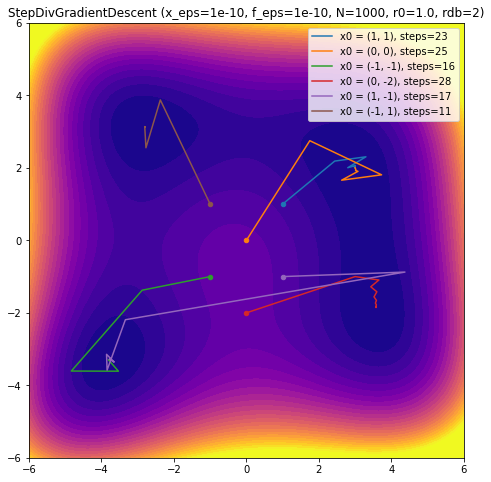

In [5]:
f = himmelblau.f
df = himmelblau.auto_d

# my_cmap = cm.coolwarm
ls = np.linspace(-8,8,200)
xx, yy = np.meshgrid(ls, ls, sparse=True)

fig = plt.gcf()
ax = plt.gca()

# Підготовка зображення
ax.set_aspect(1.0) # відношення сторін 1:1
ax.set_xlim(-6,6) # межі по x
ax.set_ylim(-6,6) # межі по y
fig.set_size_inches((8,8)) # розмір зображення в "дюймах"
ax.set_title(str(method)) # додати заголовок

# Побудова графіків
plt.contourf(ls, ls, f([xx,yy]), levels=200, vmin=0, vmax=1000, cmap='plasma') # Кольоровий графік f1(x,y) на області визначення ls x ls 

method = StepDivGradientDescent(timeout=1000, rate=1)

for x0 in [(1,1), (0,0), (-1,-1), (0,-2), (1,-1), (-1,1)]:
    result = method.optimize(f, df, x_start=x0)

    x_history, y_history = result['x_history'].T


    plt.scatter(x_history[0], y_history[0], s=20) # Позначити червоним кружечком початкову точку
    plt.plot(x_history, y_history, label=f'x0 = {x0}, steps={result["steps"]}') # Побудувати траекторію спуску 


    # Текст з описом результатів спуску
    # plt.text(0, 7.5, f"x* = {result['x']}\nf (x*) = {result['f']};\nsteps={result['steps']}\n{result['message']}", 
    #     size=15, ha='left', va='center', bbox=dict(boxstyle='square', fc='white'))

    # Додаткова детальна інформація текстом
    # print(result)
    print("x = ", result['x'], ";    f(x) = ", result['f'])
    print(f"df(1,1) = {df([1,1])}")

plt.legend()


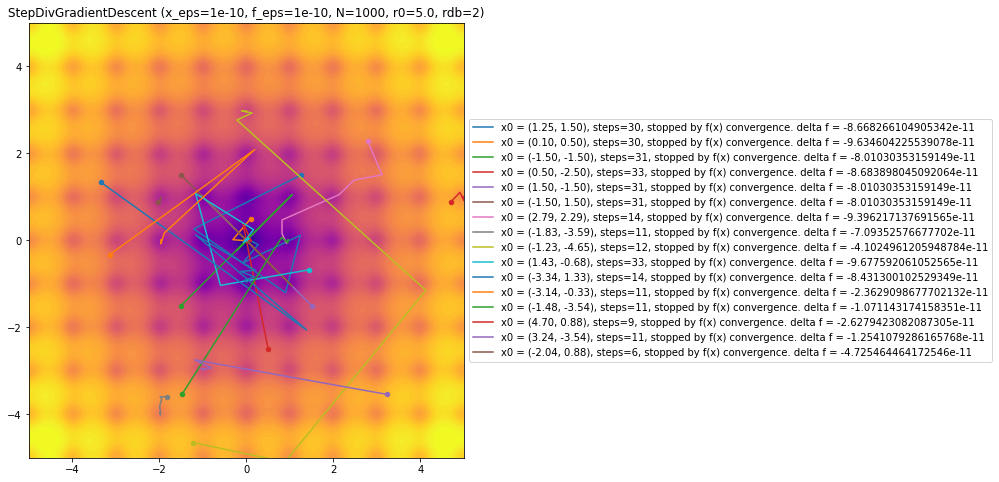

In [17]:
f = ackley.f
df = ackley.auto_d

# my_cmap = cm.coolwarm
ls = np.linspace(-5,5,200)
xx, yy = np.meshgrid(ls, ls, sparse=True)

fig = plt.gcf()
ax = plt.gca()

# Підготовка зображення
ax.set_aspect(1.0) # відношення сторін 1:1
ax.set_xlim(-5,5) # межі по x
ax.set_ylim(-5,5) # межі по y
fig.set_size_inches((8,8)) # розмір зображення в "дюймах"
ax.set_title(str(method)) # додати заголовок

# Побудова графіків
plt.contourf(ls, ls, f([xx,yy]), levels=100, vmin=0, vmax=14, cmap='plasma') # Кольоровий графік f1(x,y) на області визначення ls x ls 

method = StepDivGradientDescent(timeout=1000, rate=3)

x0s = [(1.25,1.5), (0.1,0.5), (-1.5,-1.5), (0.5,-2.5), (1.5,-1.5), (-1.5,1.5)]
x0s+=zip(np.random.choice(ls, 10), np.random.choice(ls, 10))

for x0 in x0s:
    result = method.optimize(f, df, x_start=x0)

    x_history, y_history = result['x_history'].T


    plt.scatter(x_history[0], y_history[0], s=20) # Позначити червоним кружечком початкову точку
    plt.plot(x_history, y_history, label=f'x0 = ({x0[0]:.2f}, {x0[1]:.2f}), steps={result["steps"]}, {result["message"]}') # Побудувати траекторію спуску 


    # Текст з описом результатів спуску
    # plt.text(0, 7.5, f"x* = {result['x']}\nf (x*) = {result['f']};\nsteps={result['steps']}\n{result['message']}", 
    #     size=15, ha='left', va='center', bbox=dict(boxstyle='square', fc='white'))

    # Додаткова детальна інформація текстом
    # print(result)
    # print("x = ", result['x'], ";    f(x) = ", result['f'])
    # print(f"df(1,1) = {df([1,1])}")

ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
